# SMS Spam Detection Using Machine Learning


---


## Practice Module: Pattern Recognition Systems (PRS)

## Group: 18

## Members:

Lim Jun Ming, A0231523U

Mediana, A0231458E

Yeong Wee Ping, A0231533R

# Exploratory Data Analysis

## 0. File Path & Library Setup

In [ ]:
# Load All Necessary Packages

import os
from google.colab import drive

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from collections import defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import h5py
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


seed = 18

print('Versions of key libraries')
print('-------------------------')
print('pandas:  ', pd.__version__)
print('numpy:   ', np.__version__)

Versions of key libraries
-------------------------
pandas:   1.1.5
numpy:    1.19.5


In [ ]:
# Mounting to Google Drive
drive.mount('/content/gdrive')

# Change Working Directory
os.chdir('/content/gdrive/My Drive/iss/prs_pm/training')

print('Working Directory: ')
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Working Directory: 
/content/gdrive/My Drive/iss/prs_pm/training


In [ ]:
# Load Dataset (Preprocessed)
header = ['Label', 'Text']
data = pd.read_csv('structured_data/procdata.csv', encoding='UTF-8', names=header)

## 1. Basic Statistics

In [ ]:
row, clm = data.shape

ham_count = (data['Label'] == 'ham').sum()
spam_count = (data['Label'] == 'spam').sum()

print('Information on Dataset:')
print('==========================================================')
print('Total of {:02d} data points'.format(row))
print('Total of {:02d} ham messages'.format(ham_count))
print('Total of {:02d} spam messages'.format(spam_count))
print('==========================================================')
print(data.head())


Information on Dataset:
Total of 5837 data points
Total of 4902 ham messages
Total of 935 spam messages
  Label                                               Text
0   ham                          dunno let go learn pilate
1   ham                                    wat time finish
2   ham     would really appreciate call need someone talk
3   ham                                   still grand prix
4   ham  mmm thats better got roast b better drink good...


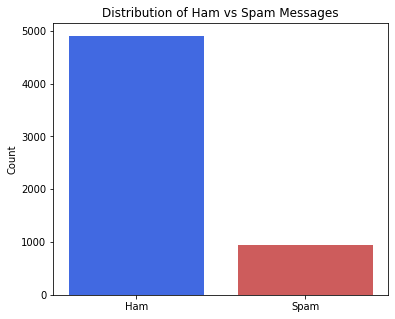

In [ ]:
# Distribution of ham vs spam count
labels = ['Ham', 'Spam']
count = [ham_count, spam_count]

plt.figure(figsize=(6,5))
plt.bar(labels, count, color=['royalblue','indianred'])
plt.ylabel('Count')
plt.title("Distribution of Ham vs Spam Messages")
plt.show()

Statistics of Message Lenght
         Ham  Spam
Mean     7.8  15.6
Median   6.0  16.0
Std      6.2   4.7
Max     77.0  39.0
Min      1.0   1.0


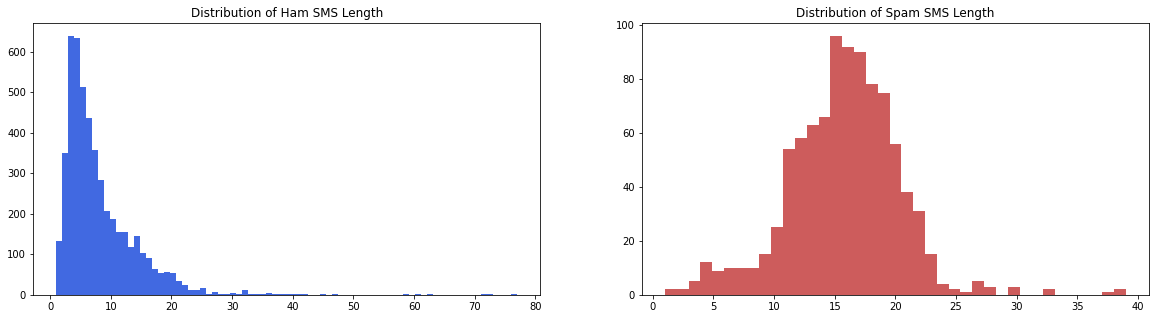

In [ ]:
# Distribution of ham vs spam message length

text_token = data['Text'].astype(str).apply(lambda x: x.split(' '))

ham_len = text_token.apply(lambda x: len(x))[data['Label'] == 'ham']
spam_len = text_token.apply(lambda x: len(x))[data['Label'] == 'spam']

stat = ['Mean', 'Median', 'Std', 'Max', 'Min']
column = ['Ham', 'Spam']
mean = [np.mean(ham_len), np.mean(spam_len)]
median = [np.median(ham_len), np.median(spam_len)]
std = [np.std(ham_len), np.std(spam_len)]
maxv = [np.max(ham_len), np.max(spam_len)]
minv = [np.min(ham_len), np.min(spam_len)]

stat_summ = pd.DataFrame([mean, median, std, maxv, minv], index=stat, columns=column)

print('Statistics of Message Length')
print('==========================================================')
print(stat_summ.round(1))
print('==========================================================')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(ham_len, bins=maxv[0], color='royalblue')
plt.title("Distribution of Ham SMS Length")
plt.subplot(122)
plt.hist(spam_len, bins=maxv[1], color='indianred')
plt.title("Distribution of Spam SMS Length")
plt.show()

## 2. Word Frequency and Word Cloud

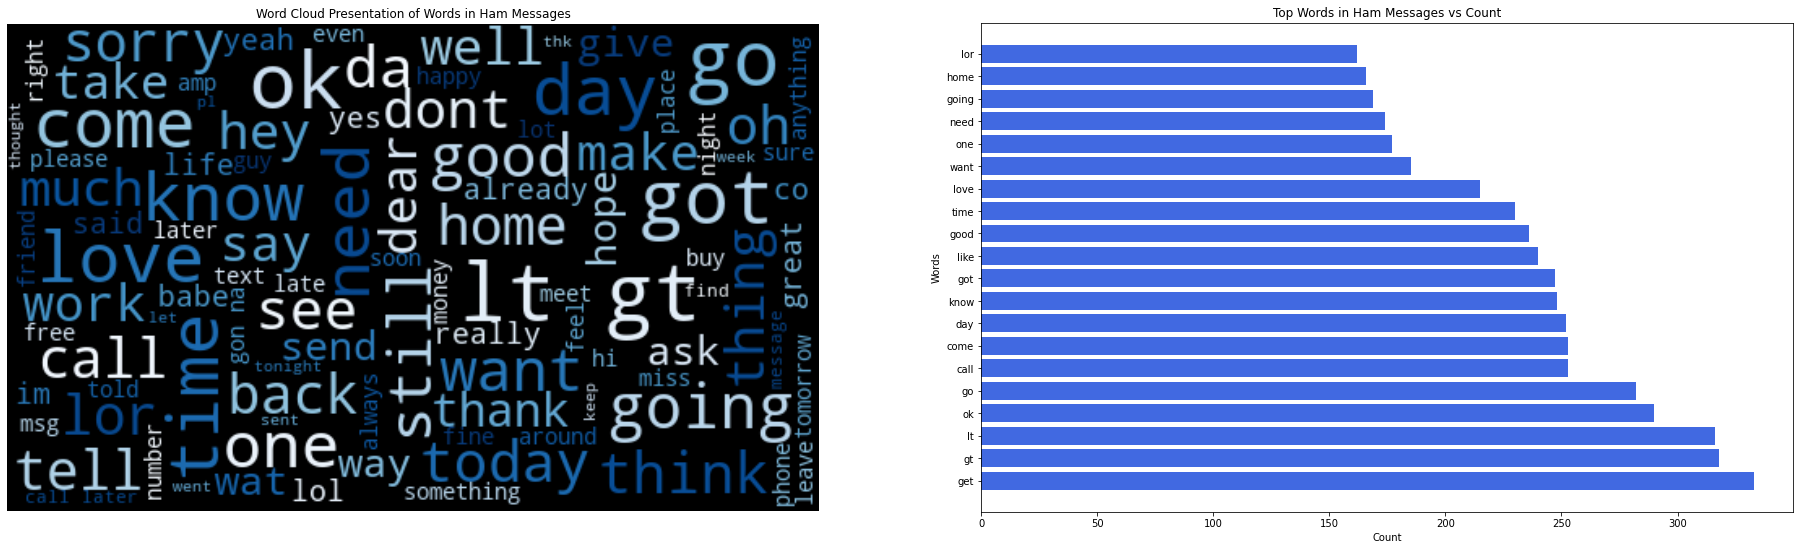

In [ ]:
# Word Cloud for Ham Messages

# Create a text consists of all words in ham messages
ham_words = " ".join([word for msg in text_token[data['Label']=='ham'] for word in msg]) # list of words

# Create ham words dictionary
ham_dic = defaultdict(int)
for i in ham_words.split(" "):
  ham_dic[i] += 1
ham_dic_sorted = dict(sorted(ham_dic.items(), key=lambda item:item[1], reverse=True))
ham_show = 20 # To show top 20 ham words

# Generate WordCloud
wordcloud = WordCloud(width=500, height=300, max_font_size=50, max_words=100, background_color="black", colormap='Blues')
ham_wc = wordcloud.generate(ham_words)

# Display the generated image:
plt.figure(figsize=(32,9))
plt.subplot(121)
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Presentation of Words in Ham Messages')
plt.subplot(122)
plt.barh(list(ham_dic_sorted.keys())[:ham_show],list(ham_dic_sorted.values())[:ham_show], color='royalblue')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Words in Ham Messages vs Count')
plt.show()

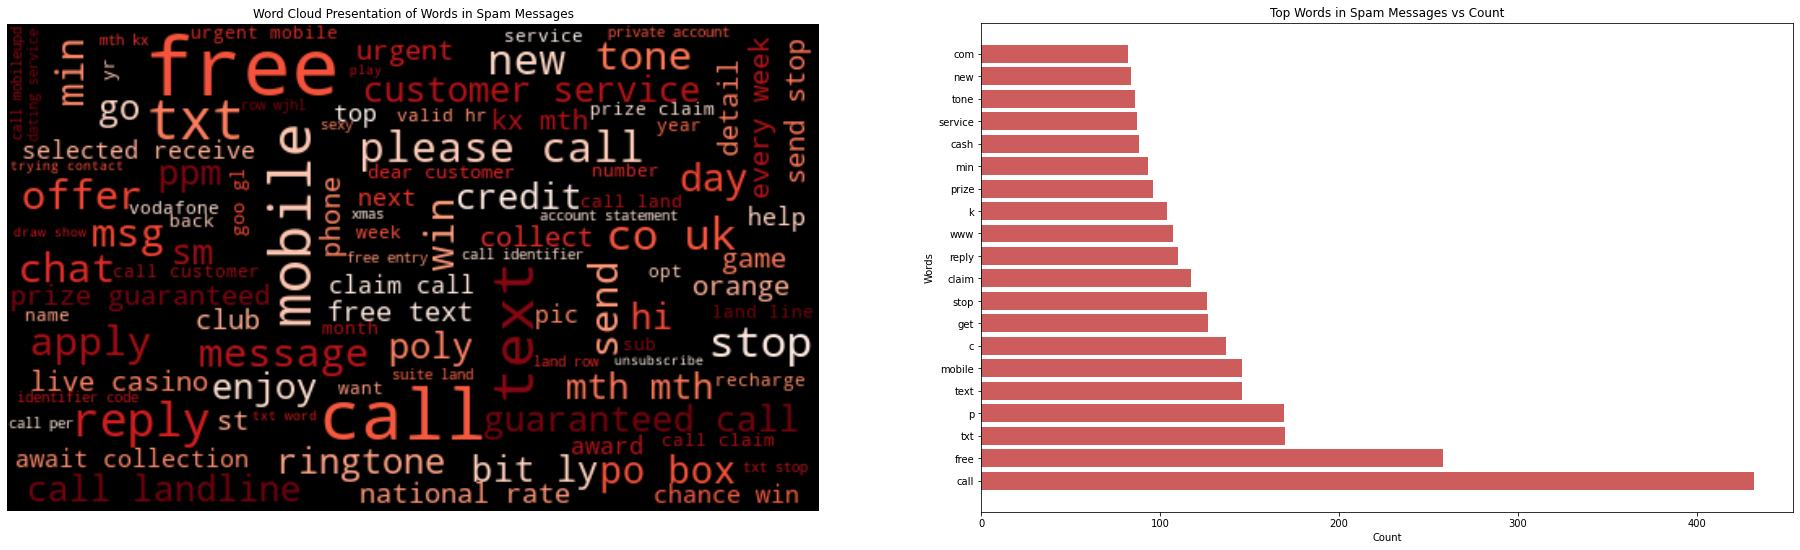

In [ ]:
# Word Cloud for Ham Messages

# Create a text consists of all words in spam messages
spam_words = " ".join([word for msg in text_token[data['Label']=='spam'] for word in msg]) # list of words

# Create spam words dictionary
spam_dic = defaultdict(int)
for i in spam_words.split(" "):
  spam_dic[i] += 1
spam_dic_sorted = dict(sorted(spam_dic.items(), key=lambda item:item[1], reverse=True))
spam_show = 20 # To show top 20 spam words

# Generate WordCloud
wordcloud = WordCloud(width=500, height=300, max_font_size=50, max_words=100, background_color="black", colormap='Reds')
spam_wc = wordcloud.generate(spam_words)

# Display the generated image:
plt.figure(figsize=(32,9))
plt.subplot(121)
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Presentation of Words in Spam Messages')
plt.subplot(122)
plt.barh(list(spam_dic_sorted.keys())[:spam_show],list(spam_dic_sorted.values())[:spam_show], color='indianred')
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Top Words in Spam Messages vs Count')
plt.show()

## 3. Visualizing Word Index Sequencing

In [ ]:
# Load data 
hf = h5py.File('input_data/X_50idx.h5', 'r')
X_train_50idx = np.array(hf.get('X_train_50idx'))
hf.close()

hf = h5py.File('input_data/y_label.h5', 'r')
y_train = np.array(hf.get('y_train'))
hf.close()

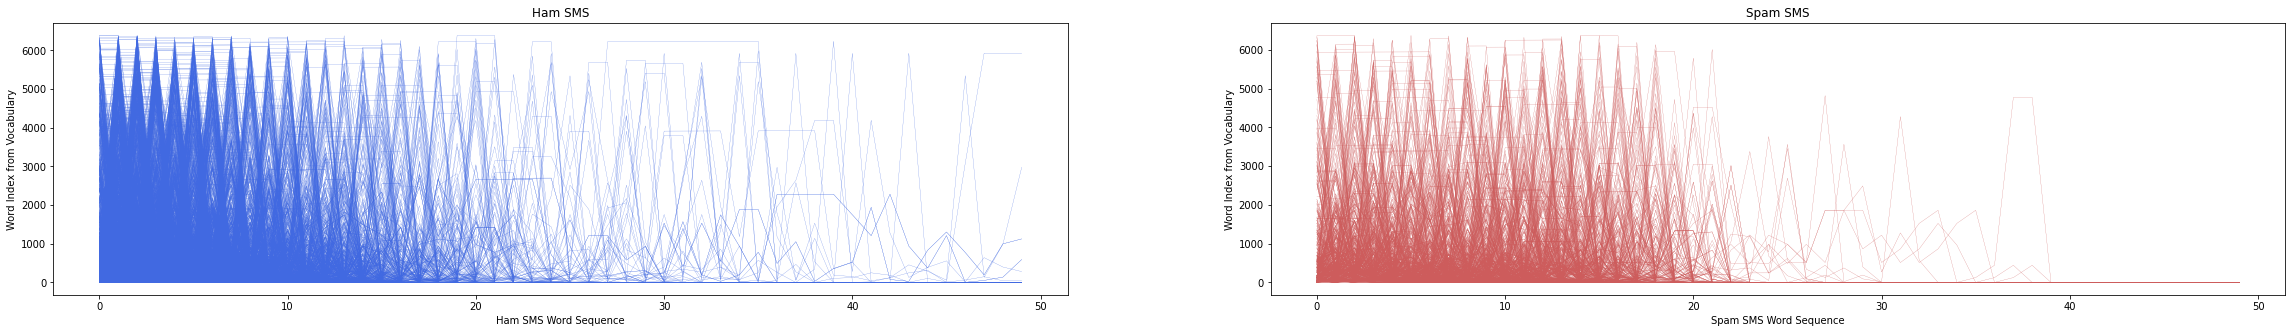

In [ ]:
# Visualizing sms word sequence vs word index
# The lower the word index, the more common the words
sample = X_train_50idx
idx = np.arange(sample.shape[1])
plt.figure(figsize=(40,5))
plt.subplot(121)
for i in np.arange(sample.shape[0]):
  if y_train[i] != 1:
    plt.plot(idx, sample[i], color='royalblue', linewidth=0.2)
plt.xlabel("Ham SMS Word Sequence")
plt.ylabel("Word Index from Vocabulary")
plt.title("Ham SMS")
plt.subplot(122)
for i in np.arange(sample.shape[0]):
  if y_train[i] == 1:
    plt.plot(idx, sample[i], color='indianred', linewidth=0.2)
plt.xlabel("Spam SMS Word Sequence")
plt.ylabel("Word Index from Vocabulary")
plt.title("Spam SMS")
plt.show()

Observations:

1. Most of the ham messages has tokenized word length < 10.

2. Most of the ham messages has common words concentrated towards beginning to the messages.

3. Most of the spam messages has tokenized word length between 5 and 15.

4. Most of the spam messages has spam words distributed evenly throughout the messsages.



## 4. Visualizing Word Embeddings in 2-D

In [ ]:
# Load and Read Pre-Trained Word Embeddings into Dictionaries

embeddings_50d = {}
with open("raw_data/glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_50d[word] = vector

In [ ]:
# Create ham and spam word vectors from dictionary
# Create a matrix where each row is a word vector for a word up to first 1000 words in the dictionary
def createwordmat(vocab_count, num_words=1000): 
    mat = []
    words = []
    count = []
    for i in np.arange(min(len(vocab_count), num_words)):
      word = list(vocab_count.keys())[i]
      vect = embeddings_50d.get(word)
      if vect is not None:
        mat.append(vect)
        words.append(word)
        count.append(vocab_count[word])
    return np.array(mat), np.array(words), np.array(count)

ham_word_mat, ham_word_list, ham_word_count = createwordmat(ham_dic_sorted, 1000)
spam_word_mat, spam_word_list, spam_word_count = createwordmat(spam_dic_sorted, 1000)

ham_word_count_norm = (ham_word_count - min(ham_word_count))/(max(ham_word_count) - min(ham_word_count)) * 1000
spam_word_count_norm = (spam_word_count - min(spam_word_count))/(max(spam_word_count) - min(spam_word_count)) * 1000

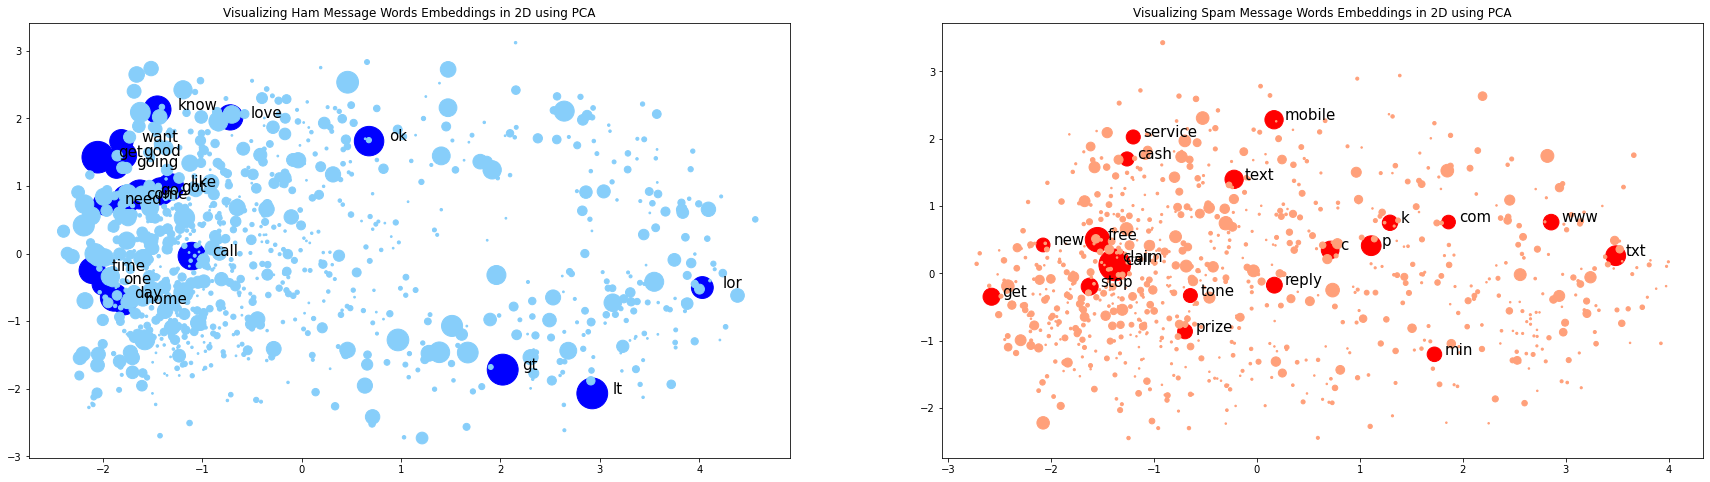

In [ ]:
# 2D Visualization Using PCA dimension reduction
pca = PCA(n_components=2)
ham_pca = pca.fit_transform(ham_word_mat)
spam_pca = pca.fit_transform(spam_word_mat)
topn_words = 20 # Top number of words to focus in plot

plt.figure(figsize=(30,8))
plt.subplot(121)
plt.scatter(ham_pca[:topn_words,0], ham_pca[:topn_words,1], s=ham_word_count_norm[:topn_words], color='blue')
plt.scatter(ham_pca[topn_words:,0], ham_pca[topn_words:,1], s=ham_word_count_norm[topn_words:], color='lightskyblue')
for i in np.arange(topn_words):
  plt.text(ham_pca[i,0]+0.2, ham_pca[i,1], s=ham_word_list[i], fontdict=dict(color='black', size=15))
plt.title('Visualizing Ham Message Words Embeddings in 2D using PCA')
plt.subplot(122)
plt.scatter(spam_pca[:topn_words,0], spam_pca[:topn_words,1], s=spam_word_count_norm[:topn_words], color='red')
plt.scatter(spam_pca[topn_words:,0], spam_pca[topn_words:,1], s=spam_word_count_norm[topn_words:], color='lightsalmon')
for i in np.arange(topn_words):
  plt.text(spam_pca[i,0]+0.1, spam_pca[i,1], s=spam_word_list[i], fontdict=dict(color='black', size=15))
plt.title('Visualizing Spam Message Words Embeddings in 2D using PCA')
plt.show()

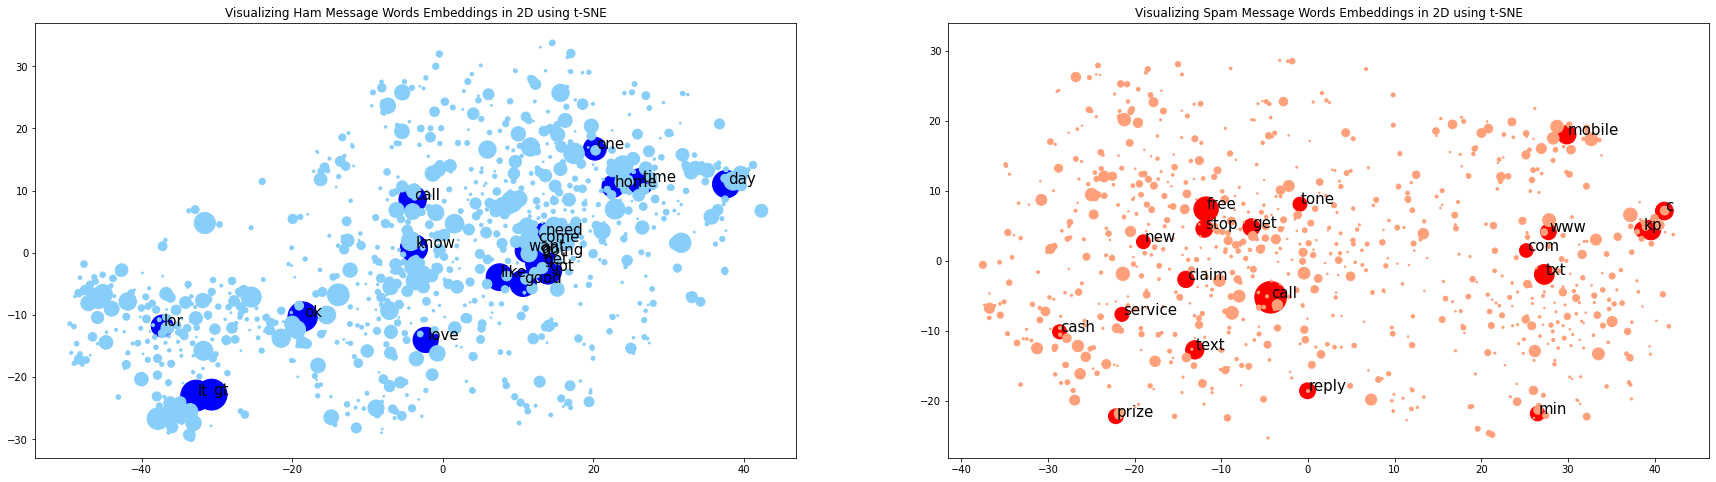

In [ ]:
# 2D Visualization Using T-distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=2)
ham_tsne = tsne.fit_transform(ham_word_mat)
spam_tsne = tsne.fit_transform(spam_word_mat)
topn_words = 20 # Top number of words to focus in plot

plt.figure(figsize=(30,8))
plt.subplot(121)
plt.scatter(ham_tsne[:topn_words,0], ham_tsne[:topn_words,1], s=ham_word_count_norm[:topn_words], color='blue')
plt.scatter(ham_tsne[topn_words:,0], ham_tsne[topn_words:,1], s=ham_word_count_norm[topn_words:], color='lightskyblue')
for i in np.arange(topn_words):
  plt.text(ham_tsne[i,0]+0.2, ham_tsne[i,1], s=ham_word_list[i], fontdict=dict(color='black', size=15))
plt.title('Visualizing Ham Message Words Embeddings in 2D using t-SNE')
plt.subplot(122)
plt.scatter(spam_tsne[:topn_words,0], spam_tsne[:topn_words,1], s=spam_word_count_norm[:topn_words], color='red')
plt.scatter(spam_tsne[topn_words:,0], spam_tsne[topn_words:,1], s=spam_word_count_norm[topn_words:], color='lightsalmon')
for i in np.arange(topn_words):
  plt.text(spam_tsne[i,0]+0.1, spam_tsne[i,1], s=spam_word_list[i], fontdict=dict(color='black', size=15))
plt.title('Visualizing Spam Message Words Embeddings in 2D using t-SNE')
plt.show()

Observations:

1. We can see that from both the 2D visualizations based on PCA and t-SNE, the frequent words in ham messages are more related (close distance) to each other, while the frequent words in spam messages are more spread out across the 2D word vector spaces.

2. We can also observe that the words in ham messages are being reused more repetively as compared to words in spam messages. (The overall marker size for words in ham messages are slightly bigger than that of in spam messages)